# Transforming text

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Read in and display the image

In [14]:
%matplotlib inline
image = cv2.cvtColor(cv2.imread("data/bcard.jpg"), cv2.COLOR_BGR2RGB)

print("Type", type(image), " size:", image.shape)

Type <class 'numpy.ndarray'>  size: (332, 460, 3)


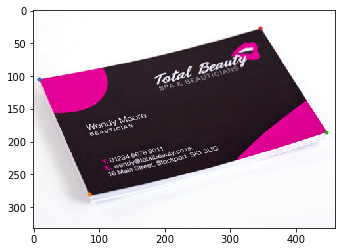

In [39]:
plt.imshow(image)

plt.plot(8, 104, ".")
plt.plot(85, 280, ".")
plt.plot(446, 185, ".")
plt.plot(345, 27, ".")

In [56]:
def warp(image):
    
    source_pts = np.float32(
        [[8, 104],
         [85, 280],
         [446, 185],
         [347, 27]]
    )
    
    wraped_pts = np.float32(
        [[10, 20],
         [10, 280],
         [450, 280],
         [450, 20]]
    )
    
    M = cv2.getPerspectiveTransform(source_pts, wraped_pts)
    M_inv = cv2.getPerspectiveTransform(wraped_pts, source_pts)
    
    image_size = (image.shape[1], image.shape[0])
    
    warped = cv2.warpPerspective(image, M, image_size, flags=cv2.INTER_LINEAR)
    
    return warped

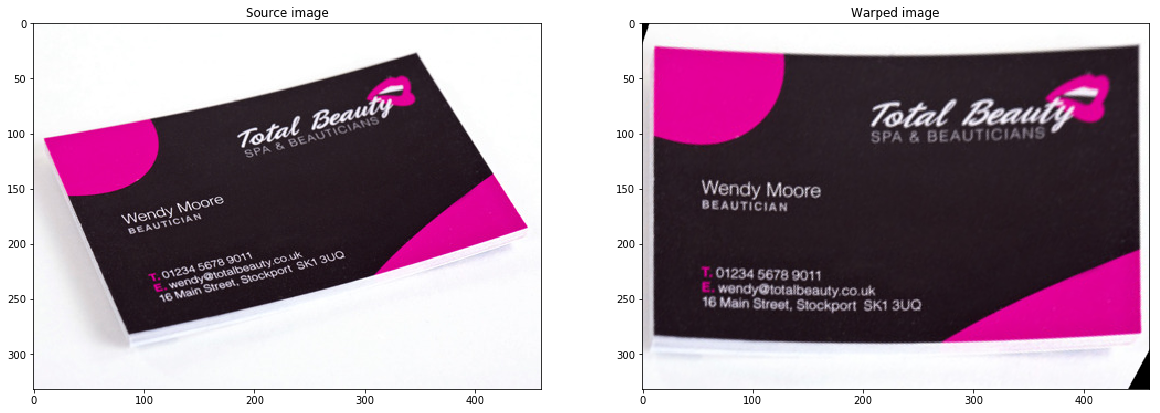

In [57]:
warped_image = warp(image)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

ax1.set_title("Source image")
ax1.imshow(image)

ax2.set_title("Warped image")
ax2.imshow(warped_image)